# Tarea 3

**Envío del PR inicial:** lunes 19 de septiembre

**Aceptación del PR:** lunes 3 de octubre

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


Haciendo el álgebra para encontrar los puntos fijos se tiene:
$$F(x_f)=x_f \Rightarrow x_f^2-2=x_f \Rightarrow x_f=1/2\pm 3/2$$

Vemos que tiene dos puntos fijos en $x=2$ o en $x=-1$

In [1]:
using Plots, PlotRecipes
pyplot()
using LaTeXStrings;

    +(AbstractArray, DataArrays.DataArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


In [2]:
#using PyPlot

In [6]:
"""Funcion que itera un sistema dinamico f(x), m veces 
los parametros de entrada son: 
la funcion f(x) que define al sistema dinamico, 
la condicion inicial x0,
m el numero de iteraciones
"""
function dyn_sys(f,x0,m)
    x=x0
    map=Float64[x]
    for i in 1:m
        x=f(x)
        push!(map,x)
    end
    return map
end 

dyn_sys (generic function with 1 method)

In [7]:
f(x)=x^2-2

f (generic function with 1 method)

In [63]:
m=100
map1=dyn_sys(f,0,m)
map2=dyn_sys(f,0.1,m)
map3=dyn_sys(f,0.001,m);


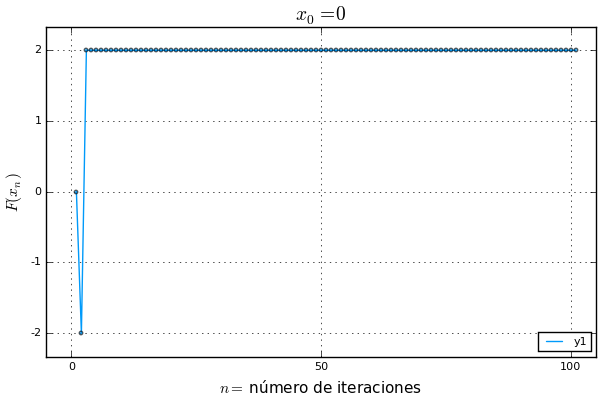

In [61]:
plot(map1,title=L"$x_0=0$",grid=true,xaxis=(L"$n=$ número de iteraciones"),
yaxis=(L"$F(x_n)$"),xlim=(-2,102), ylim=(-2.2,2.2),marker=(:dot,0.6,2.5))


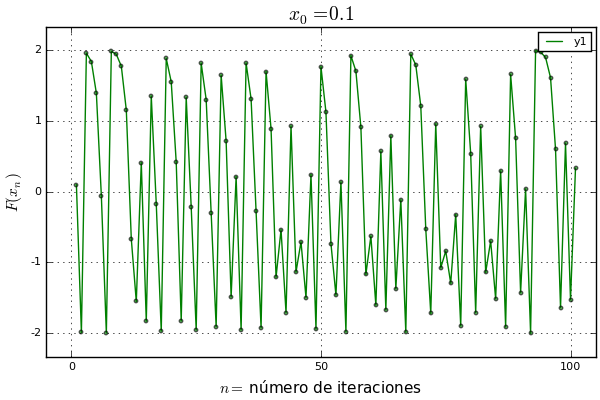

In [75]:
plot(map2,title=L"$x_0=0.1$",grid=true,xaxis=(L"$n=$ número de iteraciones"),
yaxis=(L"$F(x_n)$"),xlim=(-2,102), ylim=(-2.2,2.2),
marker=(:dot,0.6,2.5),color=:green)


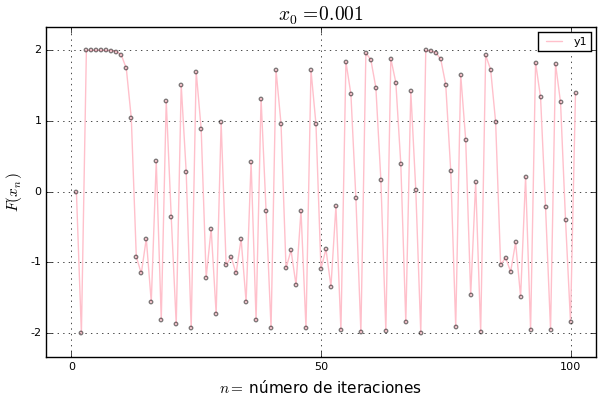

In [74]:
plot(map3,title=L"$x_0=0.001$",grid=true,xaxis=(L"$n=$ número de iteraciones"),
yaxis=(L"$F(x_n)$"),xlim=(-2,102), ylim=(-2.2,2.2),
marker=(:dot,0.5,2.5),color=:pink)

Podemos observar que la condicion inicial $x_0$=0 despues de un par de iteraciones converge al valor $F(x)=2$ que corresponde a uno de los puntos fijos del sistema dinámico. 
Las otras dos condiciones iniciales no parecen converger a ningún valor pero de alguna manera están oscilando tomadno valores que no se salen del intervalo $[-2,2]$

**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [118]:
"""Funcion que genera los arreglos para graficar la convergencia hacia los puntos fijos de un 
sistema dinámico los parametros son los siguientes:
f(x)= funcion que define al sistema dinamico
x0= condicion inicial
m= numerod e iteraciones

regresa 3 arreglos: los puntos iterados del mapeo, y los otros dos arreglos son para graficar 
las rectas que unen a los puntos en el mapeo para observar su evolucion """
function plot_dynsys(f,x0,m)
    x=x0
    map=Float64[x]
    linex=Float64[x]
    liney=Float64[0]
    for i in 1:m
        x=f(x)
        push!(map,x)
    end 
    for i in 1:m-1
        push!(linex,map[i]),push!(liney,map[i+1])
        push!(linex,map[i+1]),push!(liney,map[i+1])
    end 
    return map,linex,liney
end ;

In [119]:
F(x)=sqrt(x)

F (generic function with 1 method)

In [139]:
xrange=0:1/2^8:2
mapSQRT,xxSQRT,yySQRT=plot_dynsys(F,0.25,10);


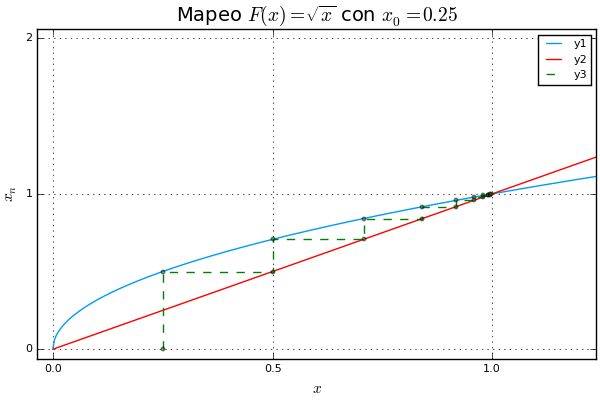

In [134]:
plot(xrange,F,title=(L"Mapeo $F(x)=\sqrt{x}$ con $x_0=0.25$"),
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(0,1.2))
plot!(xrange,identity,color=:red)
plot!(xxSQRT,yySQRT,marker=(:dot,0.5,2.5),color=:green,line=:dash)

En la gráfica anterior podemos ver como la condición inicial $x_0=0.25$ se va al punto fijo del mapeo $x=1$. 
Acontinuación se muestra otra gráfica con $x_0=1.5$


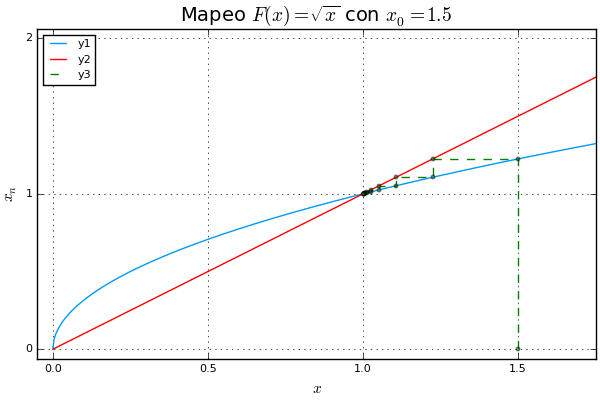

In [135]:
mapSQRT,xxSQRT,yySQRT=plot_dynsys(F,1.5,10)
plot(xrange,F,title=(L"Mapeo $F(x)=\sqrt{x}$ con $x_0=1.5$"),
xaxis=L"$x$",yaxis=(L"$x_{n}$"),xlim=(0,1.7))
plot!(xrange,identity,color=:red)
plot!(xxSQRT,yySQRT,marker=(:dot,0.5,2.5),color=:green,line=:dash)

Con lo anterior podemos inferir que el punto fijo $x=1$ es un punto fijo atractivo.
La condición inicial $x_0=0.25$, como se observa en la primer gráfica de este mapeo, se aleja del cero y va a dar al punto fijo atractivo $x^*=1$ por lo que esto sugiere que el punto fijo $x^*=0$ es un punto fijo repulsivo. 

En efecto, notemos que $F´(x)=\frac{1}{2\sqrt(x)}$ por lo que $|F´(x)|\rightarrow $ cuando $x\rightarrow 0$

**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

In [136]:
G(x)=x^2-1.1

G (generic function with 1 method)

In [158]:
xGrange=-2.5:1/2^8:2.5
G1map,xx1G,yy1G=plot_dynsys(G,0,50)
G2map,xx2G,yy2G=plot_dynsys(G,1.5,50);


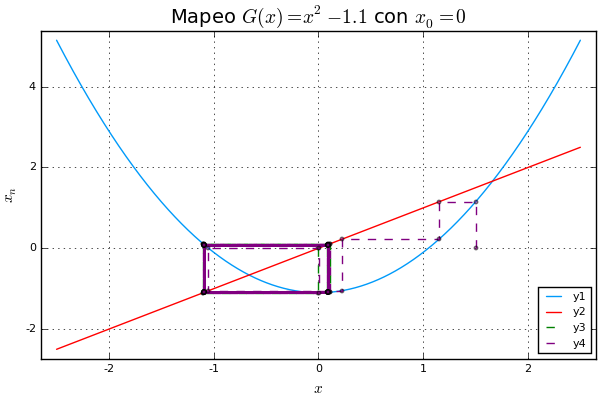

In [159]:
plot(xGrange,G,title=(L"Mapeo $G(x)=x^2-1.1$ con $x_0=0$"),
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"))
plot!(xGrange,identity,color=:red)
plot!(xx1G,yy1G,marker=(:dot,0.5,2.5),color=:green,line=:dash)
plot!(xx2G,yy2G,marker=(:dot,0.5,2.5),color=:purple,line=:dash)

En esta  gráfica podemos observar que al parecer la condición inicial $x_0=0$ cuya evolución esta pintada con la línea verde cae en una órbita periódica y la condición inicial $x_0=1.5$ (en morado) cae tambien en una  órbita periódica.
Los arreglos `G1map` y `G2map` nos dan los puntos que corresponden a la órbita preiodica.

In [160]:
[G1map G2map]

51x2 Array{Float64,2}:
  0.0         1.5       
 -1.1         1.15      
  0.11        0.2225    
 -1.0879     -1.05049   
  0.0835264   0.00353712
 -1.09302    -1.09999   
  0.0947      0.109972  
 -1.09103    -1.08791   
  0.0903506   0.0835396 
 -1.09184    -1.09302   
  0.0921075   0.0946952 
 -1.09152    -1.09103   
  0.0914076   0.0903526 
  ⋮                     
 -1.09161    -1.09161   
  0.091608    0.091608  
 -1.09161    -1.09161   
  0.091608    0.091608  
 -1.09161    -1.09161   
  0.091608    0.091608  
 -1.09161    -1.09161   
  0.091608    0.091608  
 -1.09161    -1.09161   
  0.091608    0.091608  
 -1.09161    -1.09161   
  0.091608    0.091608  

Por tanto los puntos de la órbita periódica corresponden a $x_1=-1.09161$ y a  $x_2=0.091608$.

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de esos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

In [189]:
F_1(x)=1/(3*x)
F_2(x)=-x^5/5
F_3(x)=x/2-2

F_3 (generic function with 1 method)


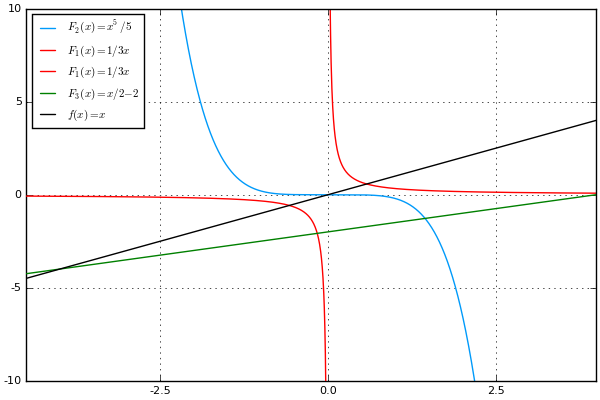

In [223]:
x4neg=-4.5:1/2^8:-1/2^8
x4pos=1/2^8:1/2^8:4
x4range=-4.5:1/2^8:4
plot(x4range,F_2,ylim=(-10,10),label=L"F_2(x)=x^5/5")

#plot
plot!(x4pos,F_1,color=:red,label=L"$F_1(x)=1/3x$")
plot!(x4neg,F_1,color=:red,label=L"$F_1(x)=1/3x$")
plot!(x4range,F_3,color=:green,label=L"$F_3(x)=x/2-2$")
plot!(x4range,identity,color=:black,label=L"$f(x)=x$")

De la intersecciond de las gráficas de las funciones con la identidad, notemos que $F_1$ tiene dos puntos fijos, $F_2$ tiene solo un punto fijo y $F_3$ un punto fijo en $x=-4$. 
Analicemos cada uno de los mapeos utilizando la funció `plot_dynsys`.

In [247]:
map1F1,xx1F1,yy1F1=plot_dynsys(F_1,0.1,25)
map2F1,xx2F1,yy2F1=plot_dynsys(F_1,0.5,25)
map3F1,xx3F1,yy3F1=plot_dynsys(F_1,2,25)
map4F1,xx4F1,yy4F1=plot_dynsys(F_1,4,25);


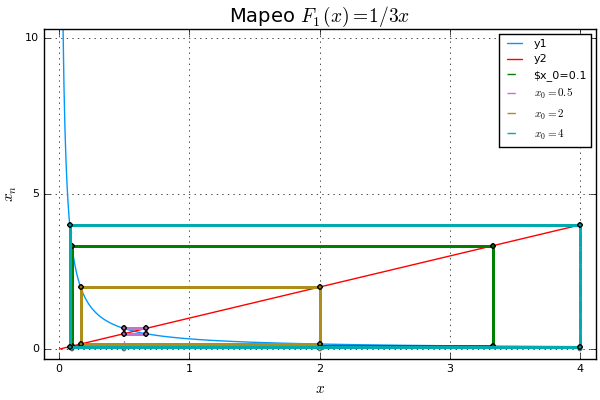

In [249]:
plot(x4pos,F_1,title=(L"Mapeo $F_1(x)=1/3x$"),
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),ylim=(0,10))
plot!(x4pos,identity,color=:red)
plot!(xx1F1,yy1F1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.1$")
plot!(xx2F1,yy2F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=0.5$")
plot!(xx3F1,yy3F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=2$")
plot!(xx4F1,yy4F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=4$")

observemos que todas las condiciones iniciales caen en órbitas periódicas con dos puntos en cada órbita. Estos puntos se pueden encontrar de la siguiente manera:
$$x_0 \Rightarrow x1=1/3x_0 \Rightarrow x2=\frac{1}{3(1/3x_0)}=x_0$$ 
por lo tanto todas las órbitas son de periodo 2 con elementos $x_0,x_1$.

En la rama negativa las órbitas se ven así:


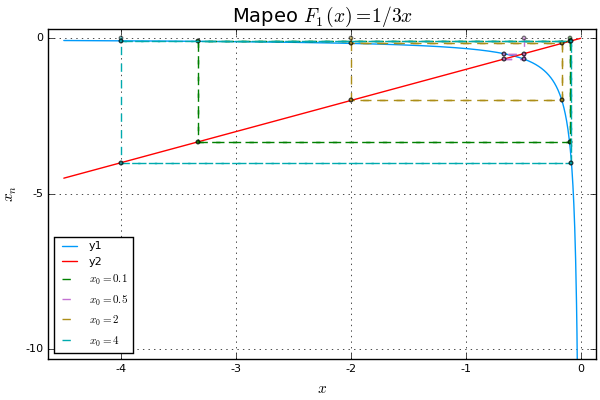

In [256]:
map1F1,xx1F1,yy1F1=plot_dynsys(F_1,-0.1,5)
map2F1,xx2F1,yy2F1=plot_dynsys(F_1,-0.5,5)
map3F1,xx3F1,yy3F1=plot_dynsys(F_1,-2,5)
map4F1,xx4F1,yy4F1=plot_dynsys(F_1,-4,5)
plot(x4neg,F_1,title=(L"Mapeo $F_1(x)=1/3x$"),
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),ylim=(-10,0.))
plot!(x4neg,identity,color=:red)
plot!(xx1F1,yy1F1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.1$")
plot!(xx2F1,yy2F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=0.5$")
plot!(xx3F1,yy3F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=2$")
plot!(xx4F1,yy4F1,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=4$")

Para la función $F_2(x)=x^5/5$ se tiene que solo hay un punto fijo. La derivada es $F´(x)=-x^4$ por lo que en el punto fijo, ésta vale cero. Por lo que es neutralmente atractivo. Veamos lo que significa graficamente.


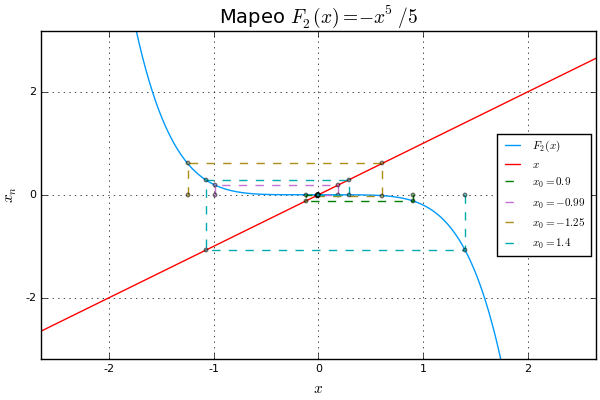

In [325]:
map1F2,xx1F2,yy1F2=plot_dynsys(F_2,0.9,5)
map2F2,xx2F2,yy2F2=plot_dynsys(F_2,-0.99,5)
map3F2,xx3F2,yy3F2=plot_dynsys(F_2,-1.25,5)
map4F2,xx4F2,yy4F2=plot_dynsys(F_2,1.4,5)

plot(x4range,F_2,title=(L"Mapeo $F_2(x)=-x^5/5$"),label=L"$F_2(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),ylim=(-3,3),xlim=(-2.5,2.5))
plot!(x4range,identity,color=:red,label=L"$x$")
plot!(xx1F2,yy1F2,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.9$")
plot!(xx2F2,yy2F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-0.99$")
plot!(xx3F2,yy3F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.25$")
plot!(xx4F2,yy4F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.4$")

Notemos que todas las condiciones iniciales $x_0$ dentro del intervalo $(-1.5,1.5)$ Son atraídas hacia el punto fijo $x=0$. Mientras que todas las condiciones iniciales que satisfacen $|x_0|\geq 1.5 $ se alejan muy rápido del origen, como se puede apreciar en el siguiente gráfico.


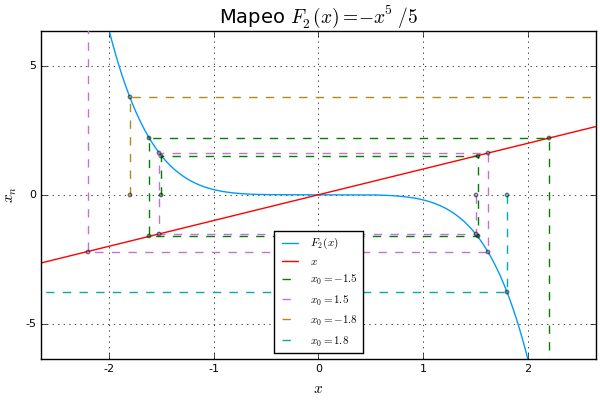

In [332]:
map1F2,xx1F2,yy1F2=plot_dynsys(F_2,-1.5,5)
map2F2,xx2F2,yy2F2=plot_dynsys(F_2,1.5,5)
map3F2,xx3F2,yy3F2=plot_dynsys(F_2,-1.8,5)
map4F2,xx4F2,yy4F2=plot_dynsys(F_2,1.8,5)

plot(x4range,F_2,title=(L"Mapeo $F_2(x)=-x^5/5$"),label=L"$F_2(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),ylim=(-6,6),xlim=(-2.5,2.5))
plot!(x4range,identity,color=:red,label=L"$x$")
plot!(xx1F2,yy1F2,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=-1.5$")
plot!(xx2F2,yy2F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.5$")
plot!(xx3F2,yy3F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.8$")
plot!(xx4F2,yy4F2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.8$")

Finalmente para el último mapeo tenemos:

In [342]:
x4frange=-7:1/2^16:-1
map1F3,xx1F3,yy1F3=plot_dynsys(F_3,-3.5,5)
map2F3,xx2F3,yy2F3=plot_dynsys(F_3,-1.5,5)
map3F3,xx3F3,yy3F3=plot_dynsys(F_3,-4.5,5)
#map4F3,xx4F3,yy4F3=plot_dynsys(F_3,-14,5)



([-4.5,-4.25,-4.125,-4.0625,-4.03125,-4.015625],[-4.5,-4.5,-4.25,-4.25,-4.125,-4.125,-4.0625,-4.0625,-4.03125],[0.0,-4.25,-4.25,-4.125,-4.125,-4.0625,-4.0625,-4.03125,-4.03125])


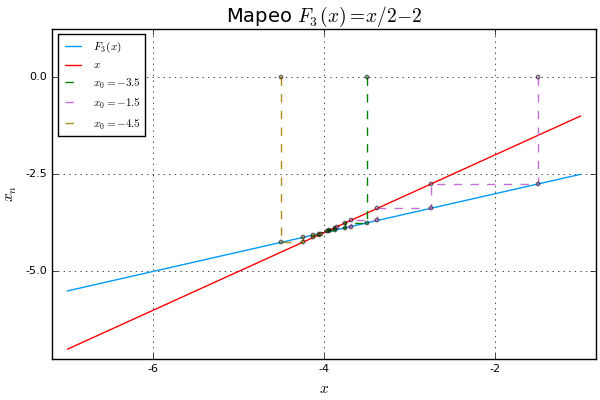

In [345]:
plot(x4frange,F_3,title=(L"Mapeo $F_3(x)=x/2-2$"),label=L"$F_3(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),ylim=(-7,1),xlim=(-7,-1))
plot!(x4frange,identity,color=:red,label=L"$x$")
plot!(xx1F3,yy1F3,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=-3.5$")
plot!(xx2F3,yy2F3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.5$")
plot!(xx3F3,yy3F3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-4.5$")
#plot!(xx4F3,yy4F3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.8$")

El punto fijo es atractivo

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [383]:
x0=2*rand()

0.4896215436088074

In [384]:
mapf=dyn_sys(f,x0,20000);


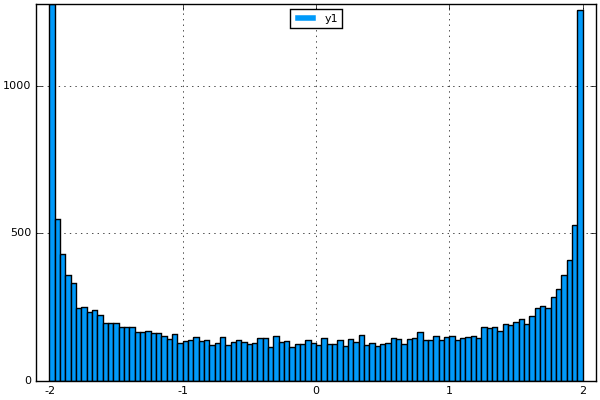

In [386]:
histogram(mapf,nbins=100,xlim=(-2.1,2.1))

Lo que podemos observar de este historgrama es que los valores de la órbita más concurridos son aquellos que estan más cercanos a los puntos extremos del intervalo de convergencia del sistema. 

**Ejercicio 6:**

Analicen los mapeos

- $F(x) = x^2$,

- $F(x) = x^3$,

- $F(x) = -x^3$,

que se satisface $F(0) = F'(0) = 0$.


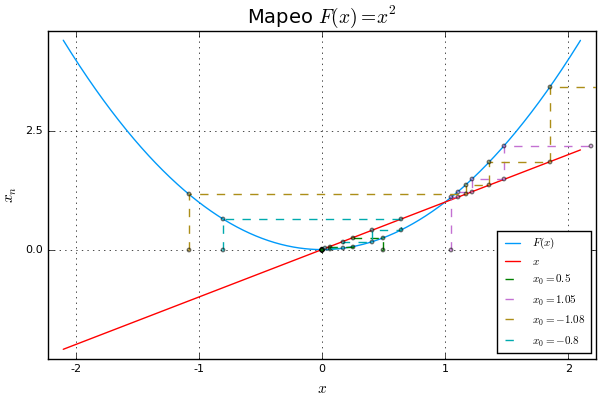

In [405]:
F(x)=x^2
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.5,10)
map2,xx2,yy2=plot_dynsys(F,1.05,5)
map3,xx3,yy3=plot_dynsys(F,-1.08,5)
map4,xx4,yy4=plot_dynsys(F,-0.8,5)
plot(range,F,title=(L"Mapeo $F(x)=x^2$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.5$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.05$")
plot!(xx3,yy3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.08$")
plot!(xx4,yy4,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-0.8$")

Se ve que todas las condiciones inicales dentro del intervalo $[-1,1]$ convergen al punto fijo $x=0$ y condiciones fuera de este intervalo se alejan del punto fijo $x=1$ que es un punto fijo repulsor mientras que el cero es un atractor.


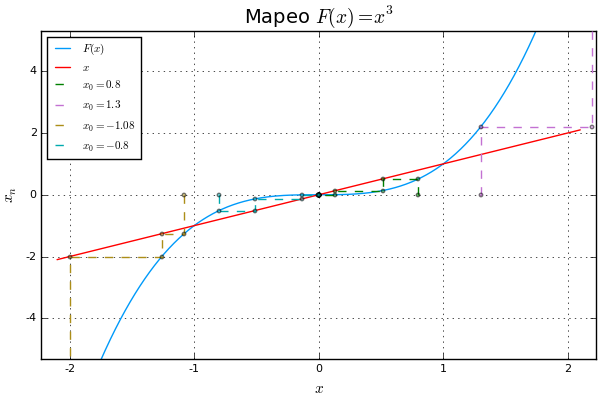

In [410]:
F(x)=x^3
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.8,10)
map2,xx2,yy2=plot_dynsys(F,1.3,5)
map3,xx3,yy3=plot_dynsys(F,-1.08,5)
map4,xx4,yy4=plot_dynsys(F,-0.8,5)
plot(range,F,title=(L"Mapeo $F(x)=x^3$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1),ylim=(-5,5))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.8$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.3$")
plot!(xx3,yy3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.08$")
plot!(xx4,yy4,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-0.8$")

De la gráfica anterior se puede observar que hay tres puntos fijos, dos de ellos $x=\pm1$ son repulsores mientras que $x=0$ es un punto atractivo atractivo. Esto se puede corroborar haciendo el cálculo algebraico con $F´(x)=3x^2$.


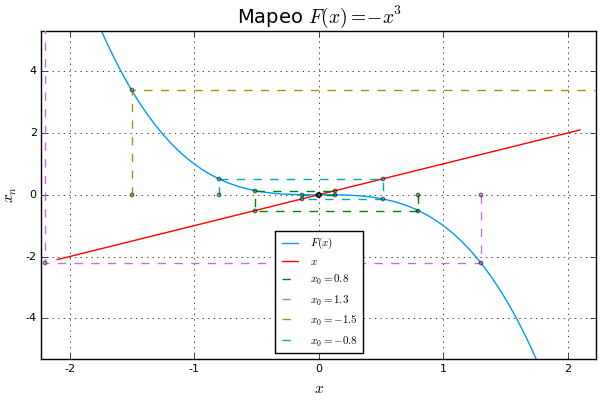

In [414]:
F(x)=-x^3
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.8,10)
map2,xx2,yy2=plot_dynsys(F,1.3,5)
map3,xx3,yy3=plot_dynsys(F,-1.5,5)
map4,xx4,yy4=plot_dynsys(F,-0.8,5)
plot(range,F,title=(L"Mapeo $F(x)=-x^3$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1),ylim=(-5,5))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.8$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.3$")
plot!(xx3,yy3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.5$")
plot!(xx4,yy4,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-0.8$")

En este último caso, el único punto fijo es $x=0$ y resulta ser un punto fijo atractivo s las condiciones iniciales están dentro del intervalo $[-1,1]$. Si las condicioes iniciales están fuera de este intervalo, el sistema dinámico diverje.

**Ejercicio 7:**

Analicen los mapeos

- $F(x) = x$,

- $F(x) = -x$,

- $F(x) = x-x^2$,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos).


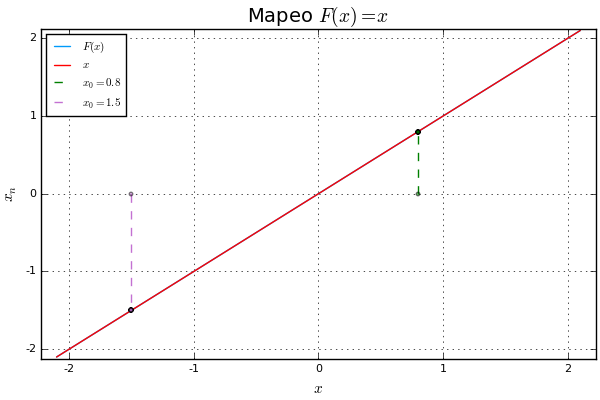

In [423]:
F(x)=x
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.8,10)
map2,xx2,yy2=plot_dynsys(F,-1.5,10)
plot(range,F,title=(L"Mapeo $F(x)=x$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1),ylim=(-2,2))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.8$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.5$")


En este caso todo punto es un punto fijo y es neutralmente atractivo. 


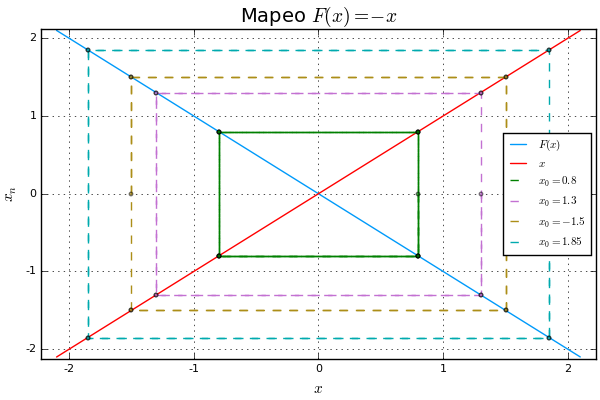

In [424]:
F(x)=-x
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.8,10)
map2,xx2,yy2=plot_dynsys(F,1.3,5)
map3,xx3,yy3=plot_dynsys(F,-1.5,5)
map4,xx4,yy4=plot_dynsys(F,1.85,5)
plot(range,F,title=(L"Mapeo $F(x)=-x$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1),ylim=(-2,2))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.8$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.3$")
plot!(xx3,yy3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.5$")
plot!(xx4,yy4,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.85$")

En este mapeo se observa que el único punto fijo es el cero pero éste no atrae, ni repele. Es neutralmente atractivo y lo que pasa es que todo punto es parte de una órbita de periodo 2, cuyos elementos son $x$ y $-x$


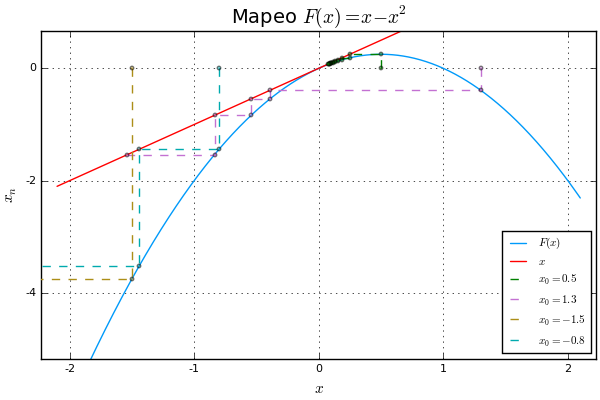

In [430]:
F(x)=x-x^2
range=-2.1:1/2^8:2.1
map1,xx1,yy1=plot_dynsys(F,0.5,10)
map2,xx2,yy2=plot_dynsys(F,1.3,5)
map3,xx3,yy3=plot_dynsys(F,-1.5,5)
map4,xx4,yy4=plot_dynsys(F,-0.8,5)
plot(range,F,title=(L"Mapeo $F(x)=x-x^2$"),label=L"$F(x)$",
xaxis=(L"$x$"),yaxis=(L"$x_{n}$"),xlim=(-2.1,2.1),ylim=(-5,0.5))
plot!(range,identity,color=:red,label=L"$x$")
plot!(xx1,yy1,marker=(:dot,0.5,2.5),color=:green,line=:dash,label=L"$x_0=0.5$")
plot!(xx2,yy2,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=1.3$")
plot!(xx3,yy3,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-1.5$")
plot!(xx4,yy4,marker=(:dot,0.5,2.5),line=:dash,label=L"$x_0=-0.8$")

El único punto fijo es $x=0$ y corresponde a un punto fijo neutralmente atractivo para puntos que estan en el intervalo  $[0,1]$ como se observa en el gráfico anterior y para puntos fuera de este intervalo se comporta como punto fijo neutralmente repulsivo.